## Kecerdasan Komputasional
### Implementasi Klasifikasi dengan ANN

# Inisialisasi dan Analisis Data

In [ ]:
import numpy as np # buat fungsi aljabar basic
import pandas as pd # data processingnya sama buat CSV file I/O
import matplotlib.pyplot as plt # buat gambar decision tree
from sklearn.model_selection import cross_val_score # ngitung akurasi dari knn
from sklearn.preprocessing import LabelEncoder, StandardScaler # label buat preprocess gender | standard buat data scaling
from sklearn.metrics import accuracy_score # untuk mendapatkan skor akurasi dari model ANN-nya
from sklearn.model_selection import train_test_split # untuk data splitting
from sklearn.compose import ColumnTransformer # untuk data preprocess kolom BP dan cholesterol
from sklearn.preprocessing import OneHotEncoder # untuk data preprocess kolom drug
import keras # library algoritma ANN
from keras.models import Sequential
from keras.layers import *

df = pd.read_csv("./drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Data Preprocessing

In [ ]:
x, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

## Encoding untuk Kolom Gender, BP, Cholesterol, dan Drug

In [ ]:
# Kolom gender
le = LabelEncoder()
x[:, 1] = le.fit_transform(x[:, 1])

# Kolom BP dan Cholesterol
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2, 3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

# Kolom drug
encoder = OneHotEncoder()
encoded_y = encoder.fit(y.reshape(-1,1))
y = encoded_y.transform(y.reshape(-1,1)).toarray()

## Data Splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Data Scaling

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Implementasi ANN

### Layer Tersembunyi

In [ ]:
modelAnn = Sequential()
modelAnn.add(Dense(units=12, activation='relu'))
modelAnn.add(Dense(units=12, activation='relu'))
# modelAnn.summary()

## Layer Output

In [ ]:
jumlah_kemungkinan_hasil =  len(set(df["Drug"]))
modelAnn.add(Dense(units=jumlah_kemungkinan_hasil, activation='softmax'))

## Kompilasi

In [ ]:
modelAnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Fit

In [ ]:
history = modelAnn.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=32, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 52ms/step - loss: 1.5938 - accuracy: 0.3313 - val_loss: 1.5396 - val_accuracy: 0.4500
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 1.5438 - accuracy: 0.4062 - val_loss: 1.5027 - val_accuracy: 0.4750
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 1.5015 - accuracy: 0.4187 - val_loss: 1.4692 - val_accuracy: 0.4250
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 1.4637 - accuracy: 0.4187 - val_loss: 1.4388 - val_accuracy: 0.4000
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 1.4303 - accuracy: 0.4688 - val_loss: 1.4117 - val_accuracy: 0.4000
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 1.3974 - accuracy: 0.4750 - val_loss: 1.3872 - val_accuracy: 0.4000
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 1.3698 - accuracy: 0.4812 - val_loss: 1.3645 - val_accuracy: 0.4000
Epoch 8/100
5/5 [=======

## Prediksi Data Test

In [ ]:
y_pred = modelAnn.predict(x_test)

2/2 [==============================] - 0s 5ms/step


## Ubah Hasil yang Diprediksi ke Nilai Aktual

In [ ]:
y_pred_outcome = []
for output in y_pred:
    list_output = [0] * jumlah_kemungkinan_hasil
    list_output[np.where(output == max(output))[0][0]] = 1
    y_pred_outcome.append(list_output)

## Dapatkan Skor Akurasi Model ANN-nya

In [ ]:
acc = accuracy_score(y_test, y_pred_outcome)
print("Akurasi dari model adalah = " + str(acc*100))

Akurasi dari model adalah = 97.5


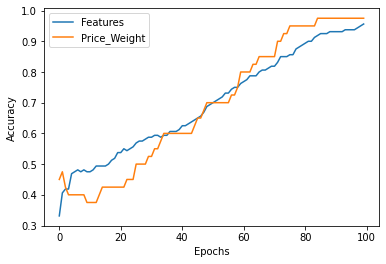

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

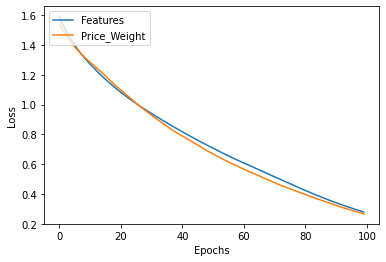

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()